In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [490]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\polynomial50.csv")
x = df[['x']].values
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

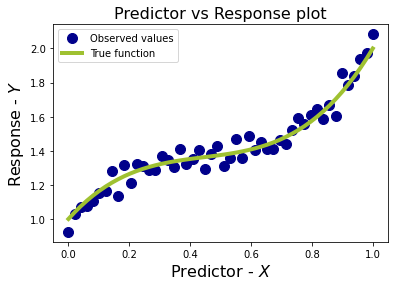

In [491]:
fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x,y, 'o', label = 'Observed values',markersize=10 ,color = 'Darkblue')
# Plot x vs true function value
ax.plot(x,f, '-', label = 'True function',linewidth=4,color ='#9FC131FF')

ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16)
plt.show()

###  Using cross Validation to find best degree

In [492]:
train_error, val_error, crossval_error = [], [], []
R2_train, R2_val = [], []
maxdeg=10
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.75)
dg = pd.DataFrame(columns=["R2 Train","R2 Validation","Train MSE","Validation MSE","Cross validation MSE"])

In [493]:
for i in range(maxdeg):
    x_poly_train = PolynomialFeatures(degree=i).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree=i).fit_transform(x_val)
    x_poly = PolynomialFeatures(degree=i).fit_transform(x)

    lreg = LinearRegression()
    lreg.fit(x_poly_train, y_train)

    # y_pred
    y_pred_train = lreg.predict(x_poly_train)
    y_pred_val = lreg.predict(x_poly_val)
    
    # R2-Score
    R2_train_score = lreg.score(x_poly_train,y_train)
    R2_val_score = lreg.score(x_poly_val,y_val)
    R2_train.append(R2_train_score)
    R2_val.append(R2_val_score)
    

    # MSE
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_val = mean_squared_error(y_val, y_pred_val)
    train_error.append(MSE_train)
    val_error.append(MSE_val)

    # Cross Validation
    cross_val = cross_validate(estimator=lreg, X=x_poly, y=y,scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    MSE_cv = -1*cross_val["test_score"].mean()
    crossval_error.append(MSE_cv)

    dg.loc[i] = [round(R2_train_score,4),round(R2_val_score,4),round(MSE_train,4),round(MSE_val,4),round(MSE_cv,4)]
dg

,R2 Train,R2 Validation,Train MSE,Validation MSE,Cross validation MSE
0,0.0000,-0.0236,0.0652,0.0422,0.0869
1,0.8535,0.8596,0.0095,0.0058,0.0165
2,0.8839,0.8579,0.0076,0.0059,0.0475
3,0.9727,0.9236,0.0018,0.0032,0.0031
4,0.9727,0.9236,0.0018,0.0032,0.0037
5,0.9727,0.9242,0.0018,0.0031,0.0497
6,0.9727,0.9236,0.0018,0.0032,0.0765
7,0.9729,0.9235,0.0018,0.0032,0.9041
8,0.9731,0.9212,0.0018,0.0033,8.7364
9,0.9739,0.9163,0.0017,0.0035,41.3382


In [494]:
idx_cv = dg["Cross validation MSE"].idxmin()
idx_val = dg["Validation MSE"].idxmin()
best_cv = dg.index.values[idx_cv]
best_mse = dg["Cross validation MSE"].values[idx_cv]
best_val = dg.index.values[idx_val]

In [495]:
best_cv
best_val
best_mse

0.0031

In [496]:
x1 = np.linspace(x.min(),x.max()).reshape(-1,1)
model = Pipeline([('poly',PolynomialFeatures(degree=best_cv)),('lreg',LinearRegression())])
model.fit(x_train,y_train)
x2 = model[0].fit_transform(x1)
y1 = model[1].predict(x2)

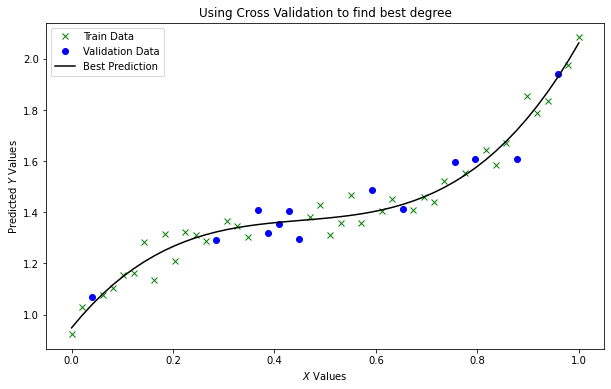

In [497]:
# Plotting train, validation data points with the predicted model

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_train, y_train,'gx', label='Train Data')
ax.plot(x_val, y_val,'bo', label='Validation Data')
ax.plot(x1,y1,'k-', label='Best Prediction')
ax.set_xlabel("$X$ Values")
ax.set_ylabel("Predicted $Y$ Values")
ax.legend(loc='best')
ax.set_title('Using Cross Validation to find best degree')
plt.show()


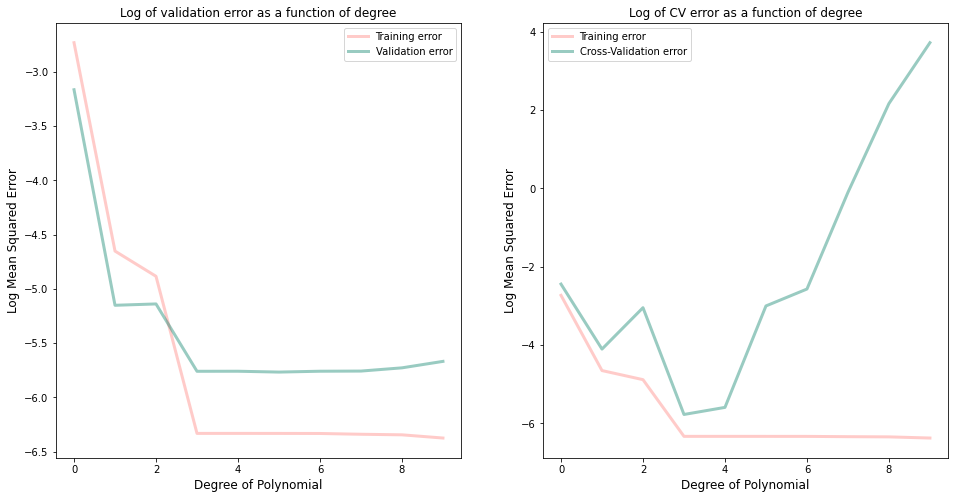

In [498]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(train_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(val_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(train_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(crossval_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show()

### Using Cross Validation to find best Regularization parameter

In [499]:
alpha_list = np.linspace(1e-7,1,10000)
# alpha_list = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]
degree = best_cv
train_error, val_error, crossval_error = [], [], []
R2_train, R2_val = [], []
dx = pd.DataFrame(columns=["R2 Train","R2 Validation","Train MSE","Validation MSE","Cross validation MSE"])

In [500]:
for i in alpha_list:
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree).fit_transform(x_val)
    x_poly = PolynomialFeatures(degree).fit_transform(x)

    # Y Predictions
    ridge_reg = Ridge(alpha=i, fit_intercept=False).fit(x_poly_train,y_train)
    y_pred_train = ridge_reg.predict(x_poly_train)
    y_pred_val = ridge_reg.predict(x_poly_val)

    # R2 Scores
    R2_train_score = ridge_reg.score(x_poly_train, y_train)
    R2_val_score = ridge_reg.score(x_poly_val, y_val)
    R2_train.append(R2_train_score)
    R2_val.append(R2_val_score)
    
    # MSE
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_val = mean_squared_error(y_val, y_pred_val)
    train_error.append(MSE_train)
    val_error.append(MSE_val)

    # Cross Validation
    cross_val = cross_validate(estimator=ridge_reg,X=x_poly, y=y, scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    MSE_cv = -1*cross_val["test_score"].mean()
    crossval_error.append(MSE_cv)

    dx.loc[i] = [round(R2_train_score,4),round(R2_val_score,4),round(MSE_train,4),round(MSE_val,4),round(MSE_cv,4)]
dx


In [ ]:
best_mse = min(crossval_error)
best_alpha = alpha_list[crossval_error.index(best_mse)]
print(f'Best alpha: {best_alpha}')
print(f'Best MSE: {round(best_mse,4)}')

Best alpha: 1e-07
Best MSE: 0.0031


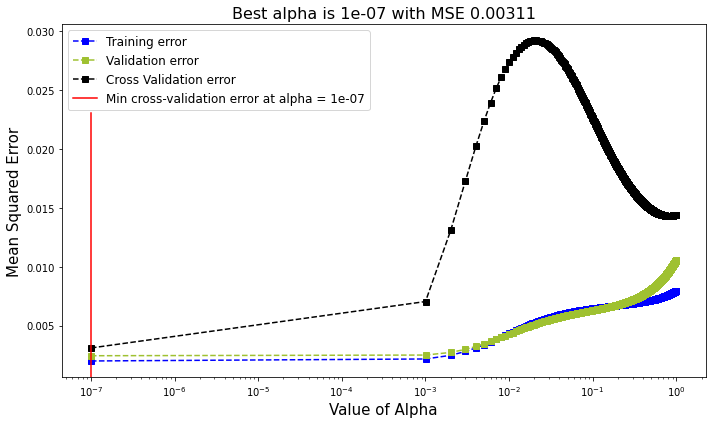

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(alpha_list,train_error, 's--',label='Training error', c='b')
ax.plot(alpha_list,val_error, 's--',label='Validation error', c='#9FC131FF')
ax.plot(alpha_list,crossval_error, 's--',label='Cross Validation error', c='k')
ax.axvline(best_alpha,0,0.75, c='r', label = f'Min cross-validation error at alpha = {best_alpha}')
ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.legend(loc = 'best',fontsize=12)
bm = round(best_mse, 5)
ax.set_title(f'Best alpha is {best_alpha} with MSE {bm}',fontsize=16)
ax.set_xscale('log')
ax.set_yscale('linear')
plt.tight_layout()